# Introduction

We'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010.

You can read more about why the data was collected [here][1]. You can also read about the different columns in the data [here][2].

[1]: https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627
[2]: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

We'll set up a pipeline of functions that will let us quickly iterate on different models as given below:-
![Image][1]

[1]: https://s3.amazonaws.com/dq-content/240/pipeline.svg

# Selecting the model

In [1]:
import re 
import numpy as np
from scipy.stats import mode
from collections import namedtuple
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,cross_val_score

%matplotlib inline

In [2]:
pd.options.display.max_columns = 100

In [3]:
housing_data = pd.read_csv('AmesHousing.tsv',delimiter='\t')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
housing_data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,

## The target attribute

Since the goal is to predict sale prices of homes, the target column would be the `SalePrice` column

In [5]:
target_column = 'SalePrice'

## `transform_features` function

In [6]:
def transform_features(dataset):
    return dataset

## `select_features` function

In [7]:
def select_features(transformed_dataset):
    model_variables = ['Gr Liv Area','SalePrice']
    final_dataset = transformed_dataset[model_variables].copy()
    return final_dataset

## `train_and_test` function

In [8]:
def train_and_test(final_dataset):
    #defining the train and test sets
    train_set = final_dataset.iloc[:1460].copy()
    test_set = final_dataset.iloc[1460:].copy()
    
    # differentiating between features and target attribute
    features = final_dataset.columns.drop(target_column)
    
    # model training process
    lr_mdl = LinearRegression()
    lr_mdl = lr_mdl.fit(train_set[features],train_set[target_column])
    
    # model testing process (predicting target attribute i.e. 'SalePrice' values)
    predicted_SalePrice_values = lr_mdl.predict(test_set[features])
    
    # determining the quality of predictions made by the model
    model_mse = mean_squared_error(test_set[target_column],predicted_SalePrice_values)
    model_rmse = np.sqrt(model_mse)
    return model_rmse

## Running the model on the sample data provided

In [9]:
transformed_dataset = transform_features(housing_data)
final_dataset = select_features(transformed_dataset)
model_rmse = train_and_test(final_dataset)

model_rmse

57088.25161263909

## Creating a copy of the dataset for refining the functions

In [10]:
housing_data_copy = housing_data.copy()

# Feature Engineering

In general, the goal of this function is to:
1. handling missing values
   - removing features based on the number of missing values
   - imputing missing values in feature columns using descriptive statistics
2. processing and transforming features
   - numerical/text columns to categorical columns
   - scaling numerical columns for use in feature selection (i.e. the next step in linear regression)
   - create new features from existing features (eg. by combining features)
3. removing features that are not relevant to machine learning
4. removing features that leak data about the target attribute (SalePrice column); eg. like the year the sale happened.

## Handling missing values

In [11]:
num_missing_values = housing_data_copy.isnull().sum()
relative_num_missing_values = (num_missing_values/housing_data_copy.shape[0])*100

### Removing features/observations based on number of missing values

Text(0, 0.5, 'Number of feature columns')

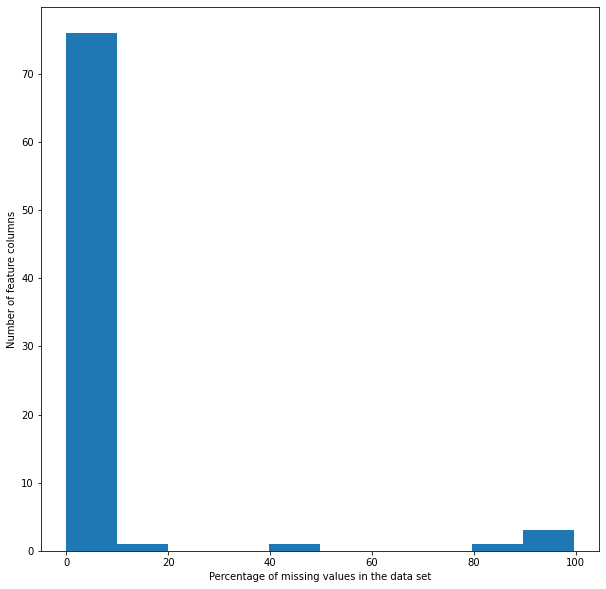

In [12]:
# histogram depicting percentage of missing values in features 
relative_num_missing_values.plot.hist(figsize=(10,10))
plt.xlabel('Percentage of missing values in the data set')
plt.ylabel('Number of feature columns')

In [13]:
# descriptive statistics for the column-wise number of missing values
relative_num_missing_values.describe()

count    82.000000
mean      5.825772
std      20.610922
min       0.000000
25%       0.000000
50%       0.000000
75%       0.034130
max      99.556314
dtype: float64

Based on the descriptive statistics and the histogram plotting the distribution of missing value percentages of various features, it appears that majority of feature columns in the dataset have less than 20% of their values to be missing
- in fact majority of the features in the dataset have missing values constitute less than 0.1% of the number of values in the columns.

Let's find out more about the features in minority that contain a large number of missing values(about 40% or more of the total number of values), so that they can be safely dropped.

#### Removing features containing a large number of missing values

In [14]:
inadequate_features = relative_num_missing_values[relative_num_missing_values > 40]
inadequate_features

Alley           93.242321
Fireplace Qu    48.532423
Pool QC         99.556314
Fence           80.477816
Misc Feature    96.382253
dtype: float64

In [15]:
num_missing_values_in_inadequate_features = num_missing_values[inadequate_features.index]
num_missing_values_in_inadequate_features

Alley           2732
Fireplace Qu    1422
Pool QC         2917
Fence           2358
Misc Feature    2824
dtype: int64

In [16]:
num_missing_values_in_inadequate_features.sort_values(ascending=False)

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Fireplace Qu    1422
dtype: int64

Most of these features have about atleast half of their values missing.
- 4 out of the 5 features have atleast 75% of the values to be missing.
  * imputing these feature columns would lead to the addition of noisy data for the model to learn.
  * removing the rows (which is about the size of the dataset) would detrimental to overall model prediction quality.
  * Hence, these 4 features should be dropped from the dataset altogether.
- the other column having about half of its values missing, can also be dropped for the same reasons mentioned above.
- the presence of a large number of missing values in all these columns, can also imply that these house amenities are not ubiquitous in the city and so should not be used as feature variables in the linear regression equation.

In [17]:
housing_data_copy.drop(columns=inadequate_features.index,inplace=True)
housing_data_copy

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,H

### Imputation

In [18]:
potential_imputable_features = relative_num_missing_values[relative_num_missing_values < 40]
potential_imputable_features

Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 77, dtype: float64

Text(0, 0.5, 'Number of feature columns')

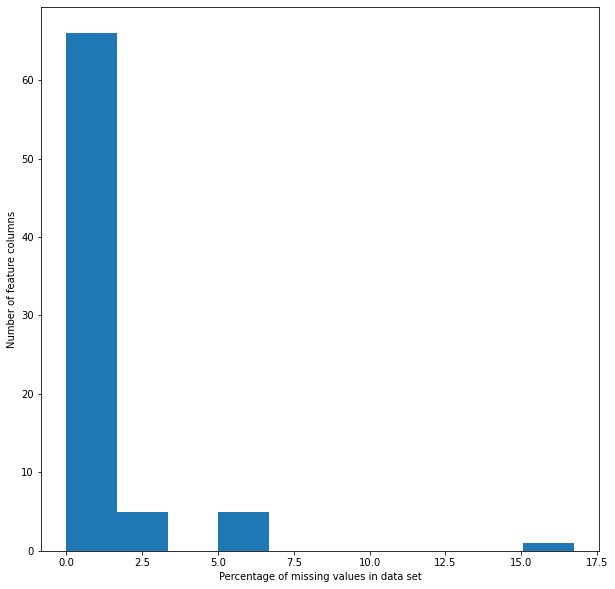

In [19]:
potential_imputable_features.plot.hist(figsize=(10,10))
plt.xlabel('Percentage of missing values in data set')
plt.ylabel('Number of feature columns')

In [20]:
# descriptive statistics for those features that don't contain a large number of missing values
potential_imputable_features.describe()

count    77.000000
mean      0.773015
std       2.349278
min       0.000000
25%       0.000000
50%       0.000000
75%       0.034130
max      16.723549
dtype: float64

Amongst the columns that don't have a large number of missing values:
- Majority of the columns have negligible number of missing values
- Among the columns that do have a sizeable number of missing values, most of them contain less than 7.5% of the total numbers as being absent.

Lets further investigate those features(from the pool of those features that contain less than 40% of the total values to be  missing) that do contain atleast 1 missing value.

In [21]:
less_num_missing_values_features = potential_imputable_features[potential_imputable_features != 0]
less_num_missing_values_features.sort_values(ascending=False,inplace=True)
less_num_missing_values_features

Lot Frontage      16.723549
Garage Finish      5.426621
Garage Qual        5.426621
Garage Yr Blt      5.426621
Garage Cond        5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Garage Cars        0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Bsmt Unf SF        0.034130
dtype: float64

<AxesSubplot:ylabel='Frequency'>

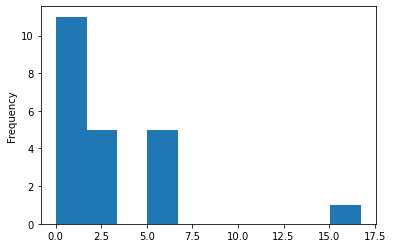

In [22]:
less_num_missing_values_features.plot.hist()

Almost all the features that contain a reasonable number of missing values have less than about 5-6% percent of their total values as missing.
- There is one column `Lot Frontage` that has approximately 17% of its values to be missing. 
  * Since we have only 2930 observations available for training and testing the linear regression model, dropping the rows could potentially decrease model accuracy.
  * From the documentation, this feature talks about the linear feet of street connected to property. This is a fairly common scenario, so dropping the column would also not make sense. It is also important when one buys a home, as this area may be used for temporarily parking vehicles.
  * Hence using an average for this column could be the best solution to tackle the missing values present.

Lets now check the type of data associated with these columns and refer to the documentation, so that appropriate imputation can be done.

In [23]:
imputable_features = housing_data_copy[less_num_missing_values_features.index].copy()
imputable_features

,Lot Frontage,Garage Finish,Garage Qual,Garage Yr Blt,Garage Cond,Garage Type,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Qual,Bsmt Cond,Mas Vnr Type,Mas Vnr Area,Bsmt Half Bath,Bsmt Full Bath,Garage Cars,BsmtFin SF 1,BsmtFin SF 2,Garage Area,Total Bsmt SF,Electrical,Bsmt Unf SF
0,141.0,Fin,TA,1960.0,TA,Attchd,Gd,Unf,BLQ,TA,Gd,Stone,112.0,0.0,1.0,2.0,639.0,0.0,528.0,1080.0,SBrkr,441.0
1,80.0,Unf,TA,1961.0,TA,Attchd,No,LwQ,Rec,TA,TA,None,0.0,0.0,0.0,1.0,468.0,144.0,730.0,882.0,SBrkr,270.0
2,81.0,Unf,TA,1958.0,TA,Attchd,No,Unf,ALQ,TA,TA,BrkFace,108.0,0.0,0.0,1.0,923.0,0.0,312.0,1329.0,SBrkr,406.0
3,93.0,Fin,TA,1968.0,TA,Attchd,No,Unf,ALQ,TA,TA,None,0.0,0.0,1.0,2.0,1065.0,0.0,522.0,2110.0,SBrkr,1045.0
4,74.0,Fin,TA,1997.0,TA,Attchd,No,Unf,GLQ,Gd,TA,None,0.0,0.0,0.0,2.0,791.0,0.0,482.0,928.0,SBrkr,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,Unf,TA,1984.0,TA,Detchd,Av,Unf,GLQ,TA,TA,None,0.0,0.0,1.0,2.0,819.0,0.0,588.0,1003.0,SBrkr,184.0
2926,NaN,Unf,TA,1983.0,TA,Attchd,Av,ALQ,BLQ,Gd,TA,None,0.0,0.0,1.0,2.0,301.0,324.0,484.0,864.0,SBrkr,239.0
2927,62.0,NaN,NaN,NaN,NaN,NaN,Av,Unf,GLQ,Gd,TA,None,0.0,1.0,0.0,0.0,337.0,0.0,0.0,912.0,SBrkr,575.0
2928,77.0,RFn,TA,1975.0,TA,Attchd,Av,LwQ,ALQ,Gd,TA,None,0.0,0.0,1.0,2.0,1071.0,123.0,418.0,1389.0,SBrkr,195.0


In [24]:
imputable_features.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [25]:
text_imputable_features = imputable_features.select_dtypes(include='object')
text_imputable_features.columns

Index(['Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type',
       'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual',
       'Bsmt Cond', 'Mas Vnr Type', 'Electrical'],
      dtype='object')

- `Garage Finish`, `Garage Qual`, `Garage Cond`, `Bsmt Exposure`, `BsmtFin Type 2`, `BsmtFin Type 1`, `Bsmt Qual`, `Bsmt Cond`, `Electrical` are ordinal variables (and are not encoded using numbers)
- `Garage Type`, `Mas Vnr Type` are nominal variables.

In [26]:
numerical_imputable_features = imputable_features.select_dtypes(include='float64')
numerical_imputable_features.columns

Index(['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath',
       'Bsmt Full Bath', 'Garage Cars', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Garage Area', 'Total Bsmt SF', 'Bsmt Unf SF'],
      dtype='object')

- `Lot Frontage`, `Mas Vnr Area`, `Garage Area`, `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 1`, `BsmtFin SF 2` are continuous variables.
- `Garage Yr Blt`, `Bsmt Half Bath`, `Bsmt Full Bath`, `Garage Cars` are discrete variables.

#### Imputation for numerical features

In [27]:
# number of missing values in numerical features before imputation
housing_data_copy[numerical_imputable_features.columns].isnull().sum()

Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Cars         1
BsmtFin SF 1        1
BsmtFin SF 2        1
Garage Area         1
Total Bsmt SF       1
Bsmt Unf SF         1
dtype: int64

##### Basement related features imputation

In [28]:
numerical_imputable_basement_features = [col for col in numerical_imputable_features.columns if re.search('Bsmt',col)]
numerical_imputable_basement_features

['Bsmt Half Bath',
 'Bsmt Full Bath',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Total Bsmt SF',
 'Bsmt Unf SF']

In [29]:
# check for number of missing values
housing_data_copy[numerical_imputable_basement_features].isnull().sum()

Bsmt Half Bath    2
Bsmt Full Bath    2
BsmtFin SF 1      1
BsmtFin SF 2      1
Total Bsmt SF     1
Bsmt Unf SF       1
dtype: int64

To fill in missing values for numerical features of a home associated with it's basement, lets additionally examine if a basement exists or not (indicated by the variable `Bsmt Qual`).

In [30]:
# basement doesn't exist:
housing_data_copy.loc[housing_data_copy['Bsmt Qual'].isnull(),numerical_imputable_basement_features].isnull().sum()

Bsmt Half Bath    2
Bsmt Full Bath    2
BsmtFin SF 1      1
BsmtFin SF 2      1
Total Bsmt SF     1
Bsmt Unf SF       1
dtype: int64

- if a basement doesn't exist, the observation has a missing value for the `Bsmt Qual` column. Then the value to be filled is 0 for both continuous variables (that relate to areas) and discrete variables (that relate to number of number of bathrooms in the basement).

In [31]:
housing_data_copy.loc[housing_data_copy['Bsmt Qual'].isnull(),numerical_imputable_basement_features] = 0

In [32]:
# checking for remaining (if any) missing values
housing_data_copy[numerical_imputable_basement_features].isnull().sum()

Bsmt Half Bath    0
Bsmt Full Bath    0
BsmtFin SF 1      0
BsmtFin SF 2      0
Total Bsmt SF     0
Bsmt Unf SF       0
dtype: int64

##### Garage related features imputation

In [33]:
numerical_imputable_garage_features = [col for col in numerical_imputable_features.columns if re.search('Garage',col)]
numerical_imputable_garage_features

['Garage Yr Blt', 'Garage Cars', 'Garage Area']

In [34]:
# check for number of missing values
housing_data_copy[numerical_imputable_garage_features].isnull().sum()

Garage Yr Blt    159
Garage Cars        1
Garage Area        1
dtype: int64

To fill in missing values for numerical features of a home associated with it's garage, lets additionally examine if a garage exists or not (indicated by the variable `Garage Type`).

In [35]:
# garage doesn't exist:
housing_data_copy.loc[housing_data_copy['Garage Type'].isnull(),numerical_imputable_garage_features].isnull().sum()

Garage Yr Blt    157
Garage Cars        0
Garage Area        0
dtype: int64

For homes, where garage doesn't exist, all missing garage feature values are consistent. However for some observations where a garage exists, there are missing values in garage related columns. Let's examine this and do appropriate imputation.

In [36]:
# garage exists:
homes_with_garage_construction_year_missing = housing_data_copy.loc[housing_data_copy['Garage Type'].notnull() & housing_data_copy[numerical_imputable_garage_features].isnull().sum(axis=1),numerical_imputable_garage_features + ['Garage Type']]
homes_with_garage_construction_year_missing

,Garage Yr Blt,Garage Cars,Garage Area,Garage Type
1356,NaN,1.0,360.0,Detchd
2236,NaN,NaN,NaN,Detchd


Let's further check the columns `Year Built` and `Year Remod/Add` in conjunction with `Garage Yr Blt` for those homes having a detached garage, to fill in good estimates.

In [37]:
house_and_garage_construction_years_cols = ['Year Built','Year Remod/Add','Garage Yr Blt']
detached_garage_construction_years = housing_data_copy.loc[(housing_data_copy['Garage Type'] == 'Detchd') & housing_data_copy['Garage Yr Blt'].notnull(),house_and_garage_construction_years_cols].copy()

Lets check correlations of year garage was built with (i)year home was built and (ii)year home was remodelled, to use a good proxy.

In [38]:
detached_garage_construction_years[house_and_garage_construction_years_cols].corr()['Garage Yr Blt']

Year Built        0.607473
Year Remod/Add    0.329775
Garage Yr Blt     1.000000
Name: Garage Yr Blt, dtype: float64

It usually looks like the garage was built closer to year the home was built, compared to when the home remodelling/additions year. Hence, let's use the `Year Built` values as proxy for `Garage Yr Blt` column for observations having a garage.

In [39]:
housing_data_copy.loc[homes_with_garage_construction_year_missing.index,'Garage Yr Blt'] = housing_data_copy.loc[homes_with_garage_construction_year_missing.index,'Year Built']

Let's now explore and impute for the single home having its garage area and garage cars unspecified.

In [40]:
incomplete_garage_specifications = housing_data_copy.loc[housing_data_copy['Garage Area'].isnull() | housing_data_copy['Garage Cars'].isnull(),numerical_imputable_garage_features+['Garage Type']].copy()
incomplete_garage_specifications

,Garage Yr Blt,Garage Cars,Garage Area,Garage Type
2236,1923.0,NaN,NaN,Detchd


Let's examine the averages of `Garage Cars` and `Garage Area` associated with homes having detached garages to determine the suitable proxies

In [41]:
housing_data_copy.loc[housing_data_copy['Garage Type'] == 'Detchd',['Garage Cars','Garage Area']].describe()

,Garage Cars,Garage Area
count,781.000000,781.000000
mean,1.549296,419.740077
std,0.572166,174.435942
min,1.000000,100.000000
25%,1.000000,280.000000
50%,2.000000,400.000000
75%,2.000000,528.000000
max,5.000000,1488.000000


In [42]:
numerical_garage_features_replacement_mapping = housing_data_copy.loc[housing_data_copy['Garage Type'] == 'Detchd',['Garage Cars','Garage Area']].mode().to_dict(orient='records')[0]
numerical_garage_features_replacement_mapping

{'Garage Cars': 2.0, 'Garage Area': 576.0}

<AxesSubplot:ylabel='Frequency'>

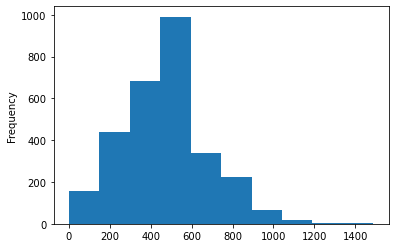

In [43]:
housing_data_copy['Garage Area'].plot.hist()

In [44]:
housing_data_copy['Garage Area'].corr(housing_data_copy['Garage Cars'])

0.8896762825411688

Since `Garage Cars` is discrete, lets use the mode (same as median), and also use the mode for `Garage Area` since this the most commonly occuring area (this is consistent with the mode for `Garage Cars` feature, as the 2 variables are in direct proprotion i.e, they have a strong positive correlation)

In [45]:
housing_data_copy.fillna(numerical_garage_features_replacement_mapping,inplace=True)

In [46]:
# checking for remaining (if any) missing values
housing_data_copy[numerical_imputable_garage_features].isnull().sum()

Garage Yr Blt    157
Garage Cars        0
Garage Area        0
dtype: int64

The missing values are consistent with the presence of no garages in certain homes, and there are no other missing values.

##### `Mas Vnr Area` feature imputation

To fill in missing values for the Masonry Veneer area of a home, lets additionally examine if masonry veneer is done during home construction (indicated by the variable `Mas Vnr Type`).

In [47]:
masonry_veneer_features = ['Mas Vnr Type','Mas Vnr Area']

In [48]:
houses_with_missing_masonry_veener = housing_data_copy.loc[housing_data_copy['Mas Vnr Area'].isnull(),masonry_veneer_features]
houses_with_missing_masonry_veener

,Mas Vnr Type,Mas Vnr Area
55,NaN,NaN
484,NaN,NaN
517,NaN,NaN
538,NaN,NaN
867,NaN,NaN
1095,NaN,NaN
1119,NaN,NaN
1122,NaN,NaN
1127,NaN,NaN
1184,NaN,NaN


In [49]:
houses_with_missing_masonry_veener.notnull().sum().sum()

0

It appears that values for the masonry veneer features are completely missing. Lets see the descriptive statistics for the features, to determine suitable proxies.

In [50]:
housing_data_copy[masonry_veneer_features].describe(include='all')

,Mas Vnr Type,Mas Vnr Area
count,2907,2907.000000
unique,5,NaN
top,None,NaN
freq,1752,NaN
mean,NaN,101.896801
std,NaN,179.112611
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,164.000000


Since Masonry Veneer Area depends on the Masonry Veneer Type, lets use typical areas associated with no masonry veeneer work done in home.

In [51]:
housing_data_copy.loc[housing_data_copy['Mas Vnr Type'] == 'None','Mas Vnr Area'].value_counts(normalize=True)*100

0.0      99.600457
1.0       0.171233
285.0     0.057078
288.0     0.057078
312.0     0.057078
344.0     0.057078
Name: Mas Vnr Area, dtype: float64

It's clear that mostly, no area is used when no masonry veneer is done. Let's then fill areas with 0's. 
- We shall set `Mas Vnr Type` to 'None' when imputing text features.

In [52]:
housing_data_copy['Mas Vnr Area'].fillna(0,inplace=True)

##### `Lot Frontage` feature imputation

To fill in missing values for the Lot Frontage of a home, lets additionally examine other Lot related features of homes.

In [53]:
lot_related_features = [col for col in housing_data_copy.columns if re.search('lot',col,flags=re.IGNORECASE)]
lot_related_features

['Lot Frontage', 'Lot Area', 'Lot Shape', 'Lot Config']

In [54]:
houses_with_missing_lot_frontage = housing_data_copy.loc[housing_data_copy['Lot Frontage'].isnull(),lot_related_features]
houses_with_missing_lot_frontage

,Lot Frontage,Lot Area,Lot Shape,Lot Config
11,NaN,7980,IR1,Inside
14,NaN,6820,IR1,Corner
22,NaN,7500,Reg,Inside
23,NaN,11241,IR1,CulDSac
24,NaN,12537,IR1,CulDSac
...,...,...,...,...
2894,NaN,16669,IR1,Corner
2897,NaN,11170,IR2,Corner
2898,NaN,8098,IR1,Inside
2912,NaN,11836,IR1,Corner


In [55]:
housing_data_copy[lot_related_features].corr()['Lot Frontage']

Lot Frontage    1.000000
Lot Area        0.491313
Name: Lot Frontage, dtype: float64

The relationship between `Lot Area` and `Lot Frontage` is not very strong.

In [56]:
houses_with_missing_lot_frontage['Lot Config'].value_counts(normalize=True)*100

Inside     55.918367
Corner     21.224490
CulDSac    17.959184
FR2         4.081633
FR3         0.816327
Name: Lot Config, dtype: float64

There are missing lot frontage values for houses with all possible types of lot configurations.

In [57]:
houses_with_missing_lot_frontage['Lot Shape'].value_counts(normalize=True)*100 

IR1    66.326531
Reg    26.938776
IR2     5.714286
IR3     1.020408
Name: Lot Shape, dtype: float64

Just like the `Lot Config` feature, all possible lot shapes are observed for homes having missing lot frontage values. Nevertheless, for imputing the Lot Frontage feature, `Lot Config` seems to be better than `Lot Shape` as the former involves the usage of frontage for determining the types of lot configuration observed in homes.

Let's then dive into `Lot Config` column for those homes that have lot frontages specified.

In [58]:
lot_config_and_frontage = housing_data_copy.loc[housing_data_copy['Lot Frontage'].notnull(),['Lot Config','Lot Frontage']]
lot_config_and_frontage

,Lot Config,Lot Frontage
0,Corner,141.0
1,Inside,80.0
2,Corner,81.0
3,Corner,93.0
4,Inside,74.0
...,...,...
2924,Inside,160.0
2925,CulDSac,37.0
2927,Inside,62.0
2928,Inside,77.0


In [59]:
lot_frontage_stats_group_by_lot_config = pd.pivot_table(data=lot_config_and_frontage,values=['Lot Frontage'],index=['Lot Config'],aggfunc=[np.mean,np.std,np.median,mode,np.size])
lot_frontage_stats_group_by_lot_config

,mean,std,median,mode,size
,Lot Frontage,Lot Frontage,Lot Frontage,Lot Frontage,Lot Frontage
Lot Config,,,,,
Corner,82.690418,25.906472,80.0,"([60.0], [47])",407.0
CulDSac,56.304348,22.717442,50.0,"([43.0], [7])",92.0
FR2,61.276923,29.179674,62.0,"([24.0], [8])",65.0
FR3,79.300000,31.531466,66.0,"([60.0], [2])",10.0
Inside,67.147374,21.302424,66.0,"([60.0], [218])",1866.0


In [60]:
lot_frontage_stats_group_by_lot_config['size'].sum()

Lot Frontage    2440.0
dtype: float64

The best average to use for filling the missing values of `Lot Frontage`, is to use the appropriate mean based on the `Lot Config` feature value for that house. Median is not a really helpful statistic, and neither is mode as mode count for each lot configuration does not account for even a quarter of the missing values for that configuration type.

In [61]:
lot_config_to_frontage_mapping = lot_frontage_stats_group_by_lot_config['mean'].to_dict()['Lot Frontage']
lot_config_to_frontage_mapping

{'Corner': 82.69041769041769,
 'CulDSac': 56.30434782608695,
 'FR2': 61.276923076923076,
 'FR3': 79.3,
 'Inside': 67.14737406216506}

In [62]:
for lot_config_type, avg_lot_frontage in lot_config_to_frontage_mapping.items():
    # impute lot frontage averages based on lot configuration value of home 
    housing_data_copy.loc[housing_data_copy['Lot Frontage'].isnull() & (housing_data_copy['Lot Config'] == lot_config_type),'Lot Frontage'] = avg_lot_frontage

##### Confirmation of imputation performed on numerical features

In [63]:
# number of missing values in numerical features after imputation
housing_data_copy[numerical_imputable_features.columns].isna().sum()

Lot Frontage        0
Garage Yr Blt     157
Mas Vnr Area        0
Bsmt Half Bath      0
Bsmt Full Bath      0
Garage Cars         0
BsmtFin SF 1        0
BsmtFin SF 2        0
Garage Area         0
Total Bsmt SF       0
Bsmt Unf SF         0
dtype: int64

#### Imputation for text features

In [64]:
# number of missing values in text features before imputation
housing_data_copy[text_imputable_features.columns].isnull().sum()

Garage Finish     159
Garage Qual       159
Garage Cond       159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
BsmtFin Type 1     80
Bsmt Qual          80
Bsmt Cond          80
Mas Vnr Type       23
Electrical          1
dtype: int64

##### `Mas Vnr Type` feature imputation

As we previously discussed while we imputed the `Mas Vnr Area` feature, we will now impute the `Mas Vnr Type` feature with 'None'. That is there is neglible masonry veneer done in such homes.

In [65]:
housing_data_copy['Mas Vnr Type'].fillna('None',inplace=True)

##### `Electrical` feature imputation

Let's use mode of this feature to impute the missing value in the sole observation that contains it.

In [66]:
electrical_stats = housing_data_copy['Electrical'].describe()
electrical_stats

count      2929
unique        5
top       SBrkr
freq       2682
Name: Electrical, dtype: object

The 'SBrkr' i.e. Standard Circuit Breakers & Romex electrical system is the most common among homes.

In [67]:
housing_data_copy['Electrical'].fillna(electrical_stats['top'],inplace=True)

##### Basement related features imputation

In [68]:
text_imputable_basement_features = [col for col in text_imputable_features.columns if re.search('Bsmt',col)]
text_imputable_basement_features

['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond']

To fill in missing values for text features of a home associated with it's basement, lets additionally examine if a basement exists or not.
- In each of the features, null value indicates no basement built.

In [69]:
# basement doesn't exist
housing_data_copy[text_imputable_basement_features].isnull().all(axis='columns').sum()

80

80 observations have no basements built. Let's now turn our attention to those homes that have basements, but contain some missing values for other basement related text features.

In [70]:
other_text_imputable_basement_features = text_imputable_basement_features.copy()
other_text_imputable_basement_features.remove('Bsmt Qual')
other_text_imputable_basement_features

['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond']

In [71]:
# basement exists but some of the other text imputable basement features are missing
houses_with_missing_other_text_basement_features = housing_data_copy.loc[housing_data_copy['Bsmt Qual'].notnull() & housing_data_copy[other_text_imputable_basement_features].isnull().any(axis='columns'),text_imputable_basement_features]
houses_with_missing_other_text_basement_features

,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Qual,Bsmt Cond
66,NaN,Unf,Unf,Gd,TA
444,No,NaN,GLQ,Gd,TA
1796,NaN,Unf,Unf,Gd,TA
2779,NaN,Unf,Unf,Gd,TA


In [72]:
unique_text_imputation_based_basement_feature_combinations = houses_with_missing_other_text_basement_features.drop_duplicates()
unique_text_imputation_based_basement_feature_combinations

,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Qual,Bsmt Cond
66,NaN,Unf,Unf,Gd,TA
444,No,NaN,GLQ,Gd,TA


In [73]:
bsmt_features_split = namedtuple('bsmt_features_split', field_names=['combination_vals','other_bsmt_features'])

unique_basement_combinations = [
    bsmt_features_split(combination_vals=data[data.notnull()],other_bsmt_features = data[data.isnull()].index) 
    for idx,data in unique_text_imputation_based_basement_feature_combinations.iterrows()
    ]
unique_basement_combinations

[bsmt_features_split(combination_vals=BsmtFin Type 2    Unf
 BsmtFin Type 1    Unf
 Bsmt Qual          Gd
 Bsmt Cond          TA
 Name: 66, dtype: object, other_bsmt_features=Index(['Bsmt Exposure'], dtype='object')),
 bsmt_features_split(combination_vals=Bsmt Exposure      No
 BsmtFin Type 1    GLQ
 Bsmt Qual          Gd
 Bsmt Cond          TA
 Name: 444, dtype: object, other_bsmt_features=Index(['BsmtFin Type 2'], dtype='object'))]

Let's now explore homes with aforementioned combinations of basement features to use the mode for imputation.

In [74]:
text_imputable_basement_feature_values_percentages = [housing_data_copy.loc[(housing_data_copy[bsmt_feature_comb.combination_vals.index] == bsmt_feature_comb.combination_vals.values).all(axis='columns'),bsmt_feature_comb.other_bsmt_features].value_counts(normalize=True)*100 for bsmt_feature_comb in unique_basement_combinations]

text_imputable_basement_feature_values_percentages

[Bsmt Exposure
 No               73.913043
 Av               16.811594
 Mn                6.376812
 Gd                2.898551
 dtype: float64,
 BsmtFin Type 2
 Unf               94.921875
 ALQ                2.734375
 Rec                1.171875
 LwQ                0.781250
 BLQ                0.390625
 dtype: float64]

- The most popular value for homes having only the `Bsmt Exposure` text based basement feature missing (i.e. 'No' -> No  Exposure), accounts for almost majority of the values in similar homes.
- The most popular value for homes having only the `BsmtFin Type 2` text based basement feature missing (i.e. 'Unf' -> Unfinished), accounts for about 95% of the values in similar homes.

Lets use these values for imputation.

In [75]:
# mapping from missing basement feature to mode
missing_basement_feature_mode_mappping = {feature_freq.name : feature_freq[0] for feature_freq in [feature_pcts.reset_index().iloc[:,0] for feature_pcts in text_imputable_basement_feature_values_percentages]}
missing_basement_feature_mode_mappping

{'Bsmt Exposure': 'No', 'BsmtFin Type 2': 'Unf'}

In [76]:
housing_data_copy.loc[houses_with_missing_other_text_basement_features.index] = housing_data_copy.loc[houses_with_missing_other_text_basement_features.index].fillna(missing_basement_feature_mode_mappping)
housing_data_copy.loc[houses_with_missing_other_text_basement_features.index]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
66,67,528445060,20,RL,73.0,8987,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,0,5,2010,WD,Normal,221500
444,445,528142130,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,Unf,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000
1796,1797,528458090,60,FV,81.0,10411,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,0,7,2007,New,Partial,212109
2779,2780,907194130,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500


##### Garage related features imputation

In [77]:
text_imputable_garage_features = [col for col in text_imputable_features.columns if re.search('Garage',col)]
text_imputable_garage_features

['Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type']

To fill in missing values for text features of a home associated with it's garage, lets additionally examine if a garage exists or not.
- In each of the features, null value indicates no garage built.

In [78]:
# garage doesn't exist
housing_data_copy[text_imputable_garage_features].isnull().all(axis='columns').sum()

157

157 observations have no garages built. Let's now turn our attention to those homes that have garages, but contain some missing values for other garage related text features.

In [79]:
other_text_imputable_garage_features = text_imputable_garage_features.copy()
other_text_imputable_garage_features.remove('Garage Type')
other_text_imputable_garage_features

['Garage Finish', 'Garage Qual', 'Garage Cond']

In [80]:
# garage exists but some of the other text imputable garage features are missing
houses_with_missing_other_text_garage_features = housing_data_copy.loc[housing_data_copy['Garage Type'].notnull() & housing_data_copy[other_text_imputable_garage_features].isnull().any(axis='columns'),text_imputable_garage_features]
houses_with_missing_other_text_garage_features

,Garage Finish,Garage Qual,Garage Cond,Garage Type
1356,NaN,NaN,NaN,Detchd
2236,NaN,NaN,NaN,Detchd


Let's examine homes with detached garages to use the mode for imputation.

In [81]:
text_imputable_garage_feature_values_percentages = housing_data_copy.loc[housing_data_copy['Garage Type'] == 'Detchd',other_text_imputable_garage_features].value_counts(normalize=True)*100
text_imputable_garage_feature_values_percentages

Garage Finish  Garage Qual  Garage Cond
Unf            TA           TA             74.358974
               Fa           TA              6.794872
                            Fa              4.615385
RFn            TA           TA              4.358974
Unf            TA           Fa              3.717949
Fin            TA           TA              2.820513
Unf            Fa           Po              0.897436
               Po           Po              0.512821
               Gd           TA              0.512821
               TA           Gd              0.384615
               Po           Fa              0.128205
               TA           Po              0.128205
               Ex           TA              0.128205
                            Ex              0.128205
Fin            TA           Fa              0.128205
               Gd           Ex              0.128205
               Fa           TA              0.128205
               Ex           Ex              0.128205
dtype:

In [82]:
most_frequent_combination = list(text_imputable_garage_feature_values_percentages.index[0])
most_frequent_combination

['Unf', 'TA', 'TA']

The most frequent combination of other garage related features values, accounts for close to majority of the combinations.

In [83]:
housing_data_copy.loc[houses_with_missing_other_text_garage_features.index,other_text_imputable_garage_features] = most_frequent_combination
housing_data_copy.loc[houses_with_missing_other_text_garage_features.index,text_imputable_garage_features]

,Garage Finish,Garage Qual,Garage Cond,Garage Type
1356,Unf,TA,TA,Detchd
2236,Unf,TA,TA,Detchd


##### Confirmation of imputation performed on text features

In [84]:
# number of missing values in text features after imputation
housing_data_copy[text_imputable_features.columns].isnull().sum()

Garage Finish     157
Garage Qual       157
Garage Cond       157
Garage Type       157
Bsmt Exposure      80
BsmtFin Type 2     80
BsmtFin Type 1     80
Bsmt Qual          80
Bsmt Cond          80
Mas Vnr Type        0
Electrical          0
dtype: int64

#### Confirming imputation of possible features

In [85]:
housing_data_copy[imputable_features.columns].isnull().sum()

Lot Frontage        0
Garage Finish     157
Garage Qual       157
Garage Yr Blt     157
Garage Cond       157
Garage Type       157
Bsmt Exposure      80
BsmtFin Type 2     80
BsmtFin Type 1     80
Bsmt Qual          80
Bsmt Cond          80
Mas Vnr Type        0
Mas Vnr Area        0
Bsmt Half Bath      0
Bsmt Full Bath      0
Garage Cars         0
BsmtFin SF 1        0
BsmtFin SF 2        0
Garage Area         0
Total Bsmt SF       0
Electrical          0
Bsmt Unf SF         0
dtype: int64

Missing values simply indicate that either a home's garage and/or basement does not exist.

## Processing and transforming features

### Converting numerical/text features to categorical features

All of the columns that can be categorized as nominal variables are the candidates for being converted to categorical. Let's refer to the documentation to easily locate the variables (23 of them).

In [86]:
candidate_nominal_variables = [
    'MS SubClass',
    'MS Zoning',
    'Street',
    'Alley',
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Condition 1',
    'Condition 2',
    'Bldg Type',
    'House Style',
    'Roof Style',
    'Roof Matl',
    'Exterior 1',
    'Exterior 2',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Garage Type',
    'Misc Feature',
    'Sale Type',
    'Sale Condition'
]

len(candidate_nominal_variables)

23

In [87]:
# some nominal variables might have been deleted due to large number of missing values in their columns
available_nominal_variables = [col for col in candidate_nominal_variables if col in housing_data_copy.columns]
print(available_nominal_variables)
len(available_nominal_variables)

['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition']


19

In [88]:
# converting the remaining nominal variables to categorical dtypes
housing_data_copy[available_nominal_variables] = housing_data_copy[available_nominal_variables].astype(dtype='category')
housing_data_copy[available_nominal_variables].dtypes

MS SubClass       category
MS Zoning         category
Street            category
Land Contour      category
Lot Config        category
Neighborhood      category
Condition 1       category
Condition 2       category
Bldg Type         category
House Style       category
Roof Style        category
Roof Matl         category
Mas Vnr Type      category
Foundation        category
Heating           category
Central Air       category
Garage Type       category
Sale Type         category
Sale Condition    category
dtype: object

Let's check if any further numerical columns need to be encoded as categorical instead (because the numbers don't have any semantic meaning)

In [89]:
housing_data_copy.select_dtypes(include=[np.number]).columns

Index(['Order', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

None of the above remaining numeric columns need to encoded as categorical, as they are either ordinal variables encoded as numbers(the numbers imply quality/rating of the home feature in question) or are variables measured on a ratio/interval scale describing home/room areas or quantities.
- This follows from the fact that the numbers associated with variables measured on an ordinal/ratio/interval scale have an inherent semantic meaning.

### Creating new features from existing features

Let's see if new features can be created, that better capture the information in some of the existing features.

The year related columns are good candidates for creating features that convey information in a proper format as required for model training and test purposes.

In [90]:
year_related_columns = [col for col in housing_data_copy.columns if re.search('Year|Yr',col)]
year_related_columns

['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']

Useful new features that could be created include:
1. number of years elapsed from time of house construction to house additions/remodelling.
2. number of years elapsed from time of house additions/remodelling to sale of house.
3. number of years elapsed from time of house construction to sale of house(addition of the 2 features mentioned above; this is made for convenience in calculations later on.

In [91]:
wrong_observation_indices = list()

In [92]:
years_until_remod = housing_data_copy['Year Remod/Add'] - housing_data_copy['Year Built']

# sanity check for the calculations
print(years_until_remod[years_until_remod<0])
wrong_observation_indices.extend(years_until_remod[years_until_remod<0].index)

850   -1
dtype: int64


In [93]:
years_from_remod_until_sale = housing_data_copy['Yr Sold'] - housing_data_copy['Year Remod/Add']

# sanity check for the calculations
print(years_from_remod_until_sale[years_from_remod_until_sale<0])
wrong_observation_indices.extend(years_from_remod_until_sale[years_from_remod_until_sale<0].index)

1702   -1
2180   -2
2181   -1
dtype: int64


In [94]:
years_until_sale = housing_data_copy['Yr Sold'] - housing_data_copy['Year Built']

# sanity check for the calculations
print(years_until_sale[years_until_sale<0])
wrong_observation_indices.extend(years_until_sale[years_until_sale<0].index)

2180   -1
dtype: int64


In [95]:
# final indices of misleading observations
wrong_observation_indices  = list(set(wrong_observation_indices))
wrong_observation_indices

[850, 2180, 2181, 1702]

In [96]:
# Creating new features
housing_data_copy['Yrs Until Remod/Add'] = years_until_remod
housing_data_copy['Yrs From Remod/Add Until Sale'] = years_from_remod_until_sale
housing_data_copy['Yrs Until Sale'] = years_until_sale

housing_data_copy.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Yrs Until Remod/Add,Yrs From Remod/Add Until Sale,Yrs Until Sale
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000,0,50,50
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000,0,49,49
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000,0,52,52
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000,0,42,42
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900,1,12,13


In [97]:
# dropping original features except year of sale
housing_data_copy.drop(columns=['Year Built','Year Remod/Add'],inplace=True)

In [98]:
# dropping rows with misleading year information as it could be fake and lead to wrong predictions
housing_data_copy.drop(index=wrong_observation_indices,inplace=True)

## Removing features that are irrelevant for prediction purposes

From the documentation, the columns `Order` (i.e. Observation number) and `PID` (i.e. Parcel identification number - can be used with city web site for parcel review), in no way signal if a house is better than another house. These are just for exclusivity and identification purposes (observation identifiers). Hence let's remove these columns.

In [99]:
housing_data_copy.drop(columns=['Order','PID'],inplace=True)

## Removing features that leak data about the target attribute

In [100]:
sale_related_features = [col for col in housing_data_copy.columns if re.search('Sale|Sold',col,flags=re.IGNORECASE)]
sale_related_features

['Mo Sold',
 'Yr Sold',
 'Sale Type',
 'Sale Condition',
 'SalePrice',
 'Yrs From Remod/Add Until Sale',
 'Yrs Until Sale']

Among these `Mo Sold`, `Yr Sold`, `Sale Type` and `Sale Condition` columns directly leak information about `SalePrice` attribute. Hence let's remove these columns.

In [101]:
housing_data_copy.drop(columns=['Mo Sold','Yr Sold','Sale Type','Sale Condition'],inplace=True)

In [102]:
# lets rearrange the columns in the dataset so that the target attribute is the last column in the dataset
housing_data_columns = list(housing_data_copy.columns)
housing_data_columns.remove(target_column)
housing_data_columns.append(target_column)
housing_data_copy = housing_data_copy[housing_data_columns]
housing_data_copy

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yrs Until Remod/Add,Yrs From Remod/Add Until Sale,Yrs Until Sale,SalePrice
0,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,0,50,50,215000
1,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,0,49,49,105000
2,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,0,52,52,172000
3,20,RL,93.000000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,0,42,42,244000
4,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,1,12,13,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.000000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,0,0,22,22,142500
2926,20,RL,67.147374,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,0,0,23,23,131000
2927,85,RL,62.000000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,0,14,14,132000
2928,20,RL,77.000000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,0,0,0,0,0,1,31,32,170000


## Running the model on the updated data

In [103]:
final_dataset = select_features(housing_data_copy)
model_rmse = train_and_test(final_dataset)

model_rmse

55284.62277814025

The improvement due to feature engineering is visible in the form of reduced RMSE value of the model. So quality of model predictions is relatively better than before(prior to feature engineering, using the non-tranformed dataset).

# Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

## Feature Selection for numerical features

In [104]:
numerical_features = housing_data_copy.select_dtypes(include=[np.number])
numerical_features

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yrs Until Remod/Add,Yrs From Remod/Add Until Sale,Yrs Until Sale,SalePrice
0,141.000000,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,0,50,50,215000
1,80.000000,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,0,49,49,105000
2,81.000000,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,0,52,52,172000
3,93.000000,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,0,42,42,244000
4,74.000000,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,1,12,13,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,0,22,22,142500
2926,67.147374,8885,5,5,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,0,23,23,131000
2927,62.000000,10441,5,5,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,0,14,14,132000
2928,77.000000,10010,5,5,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,1,31,32,170000


In [105]:
# numerical features that we will use for training the linear regression model
numerical_model_features = list()

### Correlating Feature Columns With Target Column

Let's generate a correlation matrix heatmap for the numerical attributes, in addition to calculating the p-value(Pearson's correlation coefficient) between pairs of numerical attributes(correlation matrix).

#### Correlation matrix for numerical attributes

In [106]:
numerical_features_corr_mtx = numerical_features.corr()
numerical_features_corr_mtx

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yrs Until Remod/Add,Yrs From Remod/Add Until Sale,Yrs Until Sale,SalePrice
Lot Frontage,1.000000,0.348723,0.189314,-0.063900,0.193069,0.186967,0.036404,0.105489,0.315333,0.411085,0.027186,0.005337,0.340512,0.096229,-0.031422,0.159856,0.036228,0.219553,0.006371,0.319060,0.222465,0.067882,0.280847,0.327500,0.097599,0.137482,0.013747,0.019205,0.072032,0.155571,0.001022,-0.065620,-0.078943,-0.106465,0.335245
Lot Area,0.348723,1.000000,0.090415,-0.033475,0.114987,0.180245,0.084463,0.020926,0.241361,0.321323,0.030405,0.001108,0.273745,0.122325,0.022175,0.123624,0.032192,0.138299,-0.019804,0.208252,0.254834,-0.012003,0.176278,0.207521,0.152842,0.089205,0.023014,0.016621,0.056144,0.094423,0.038015,-0.009072,-0.019830,-0.020859,0.267517
Overall Qual,0.189314,0.090415,1.000000,-0.093806,0.419045,0.278050,-0.040490,0.269009,0.545709,0.474803,0.240515,-0.048566,0.567967,0.167085,-0.044898,0.520860,0.267151,0.064186,-0.159695,0.376292,0.391893,0.569317,0.598470,0.560989,0.253056,0.290598,-0.139841,0.018562,0.042479,0.030654,-0.027666,-0.256472,-0.570161,-0.596283,0.801212
Overall Cond,-0.063900,-0.033475,-0.093806,1.000000,-0.132110,-0.049858,0.040798,-0.136935,-0.174718,-0.157639,0.006540,0.009106,-0.114954,-0.043075,0.084950,-0.213810,-0.087709,-0.006227,-0.086547,-0.088957,-0.031313,-0.327012,-0.181041,-0.152938,0.021116,-0.067174,0.071229,0.043789,0.043868,-0.016834,0.047052,0.505319,-0.046508,0.369174,-0.101498
Mas Vnr Area,0.193069,0.114987,0.419045,-0.132110,1.000000,0.284582,-0.014158,0.087492,0.378653,0.376290,0.119638,-0.057382,0.387352,0.137254,0.008740,0.252396,0.186559,0.083411,-0.050545,0.267315,0.267431,0.242513,0.354780,0.365601,0.158774,0.123389,-0.109801,0.014683,0.068349,0.005139,-0.022890,-0.220184,-0.190887,-0.306276,0.507010
BsmtFin SF 1,0.186967,0.180245,0.278050,-0.049858,0.284582,1.000000,-0.053505,-0.487622,0.522592,0.439487,-0.167391,-0.066626,0.188418,0.644375,0.068992,0.073365,-0.012505,-0.117777,-0.086979,0.030531,0.294682,0.192442,0.252887,0.304163,0.216457,0.105375,-0.100179,0.051737,0.098571,0.085618,0.015816,-0.221273,-0.148090,-0.277667,0.439365
BsmtFin SF 2,0.036404,0.084463,-0.040490,0.040798,-0.014158,-0.053505,1.000000,-0.238427,0.093470,0.088367,-0.098172,-0.005030,-0.016798,0.164006,0.099715,-0.075881,-0.032739,-0.033092,-0.037950,-0.048765,0.067505,-0.067272,-0.014021,0.004048,0.099256,-0.003929,0.032275,-0.023357,0.062870,0.044381,-0.002659,-0.019579,0.062007,0.027157,0.006156
Bsmt Unf SF,0.105489,0.020926,0.269009,-0.136935,0.087492,-0.487622,-0.238427,1.000000,0.414970,0.297117,0.001277,0.047390,0.234367,-0.399205,-0.107587,0.274333,-0.035630,0.189100,0.065983,0.250308,-0.000017,0.169089,0.178935,0.162535,-0.040418,0.113335,0.006806,-0.005288,-0.047686,-0.031935,-0.026799,-0.018659,-0.166574,-0.129530,0.182862
Total Bsmt SF,0.315333,0.241361,0.545709,-0.174718,0.378653,0.522592,0.093470,0.414970,1.000000,0.792182,-0.210853,-0.023061,0.426779,0.328110,0.001464,0.324783,-0.061921,0.056617,-0.038198,0.266543,0.332291,0.348056,0.438561,0.482220,0.222510,0.222824,-0.084480,0.039217,0.078533,0.073837,-0.011805,-0.256294,-0.298472,-0.409036,0.644023
1st Flr SF,0.411085,0.321323,0.474803,-0.157639,0.376290,0.439487,0.088367,0.297117,0.792182,1.000000,-0.258341,-0.012379,0.547023,0.258169,-0.002137,0.372712,-0.113443,0.112280,0.078971,0.377196,0.407300,0.259159,0.440973,0.488414,0.218832,0.212991,-0.065086,0.045667,0.102231,0.124948,-0.011605,-0.181742,-0.241679,-0.310733,0.635183


In [107]:
# correlation strength matrix
corr_strength_mtx = numerical_features_corr_mtx.abs()

In [108]:
# focussing on strength of correlations between features and target attribute
features_targetcol_correlations = corr_strength_mtx[target_column].sort_values()
features_targetcol_correlations

BsmtFin SF 2                     0.006156
Misc Val                         0.019264
3Ssn Porch                       0.032279
Bsmt Half Bath                   0.035852
Low Qual Fin SF                  0.037620
Pool Area                        0.068445
Overall Cond                     0.101498
Screen Porch                     0.112310
Kitchen AbvGr                    0.119743
Enclosed Porch                   0.128656
Bedroom AbvGr                    0.143902
Bsmt Unf SF                      0.182862
Yrs Until Remod/Add              0.240017
Lot Area                         0.267517
2nd Flr SF                       0.269707
Bsmt Full Bath                   0.276214
Half Bath                        0.284974
Open Porch SF                    0.316277
Wood Deck SF                     0.328158
Lot Frontage                     0.335245
BsmtFin SF 1                     0.439365
Fireplaces                       0.474994
TotRms AbvGrd                    0.498614
Mas Vnr Area                     0

In [109]:
# percentage of features with absolute p-value(w.r.t target attribute) being atleast 0.4
strong_features_targetcol_correlations = features_targetcol_correlations[features_targetcol_correlations >= 0.4]
(strong_features_targetcol_correlations.size/features_targetcol_correlations.size)*100

42.857142857142854

Let's choose an initial p-val of 0.4 as the threshold/cut-off value for a numerical feature to be described as strongly correlating with the target attribute (i.e. `SalePrice`).
- We chose 0.4 as:
    * about 43% of numerical features can be considered for the linear regression model, giving us a good base to begin with.
    * 0.4 as a correlation strength is generally considered to be moderately strong.

Let's consolidate this assertion with a visualization of the correlation strength matrix heatmap.

#### Correlation strength matrix heatmap for numerical attributes

<AxesSubplot:>

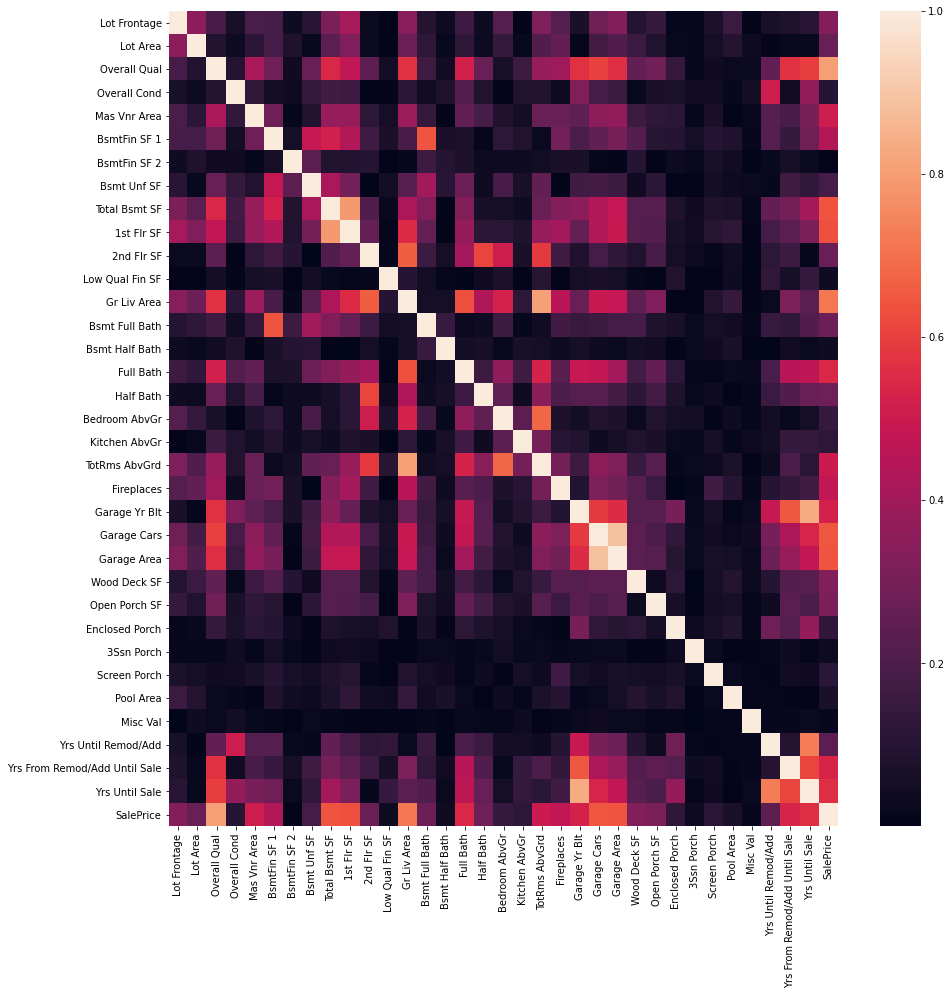

In [110]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_strength_mtx)

The heatmap plotted above affirms the assertion made.

In [111]:
numerical_model_features.extend(strong_features_targetcol_correlations.index)
numerical_model_features

['BsmtFin SF 1',
 'Fireplaces',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Garage Yr Blt',
 'Yrs From Remod/Add Until Sale',
 'Full Bath',
 'Yrs Until Sale',
 '1st Flr SF',
 'Garage Area',
 'Total Bsmt SF',
 'Garage Cars',
 'Gr Liv Area',
 'Overall Qual',
 'SalePrice']

### Checking for collinearity between features

Collinearity exists between 2 features if:
1. the 2 feature columns are highly correlated, and 
2. they stand the risk of duplicating information.
    - Scenarios where data duplication could be observed:
        * If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.
        * If one feature subsumes the information contained in another feature.

In [112]:
# correlation matrix for strongly correlated numeric attributes
strongly_correlated_numerical_features_corr_mtx = numerical_features_corr_mtx.loc[strong_features_targetcol_correlations.index,strong_features_targetcol_correlations.index]

strongly_correlated_numerical_features_corr_mtx

,BsmtFin SF 1,Fireplaces,TotRms AbvGrd,Mas Vnr Area,Garage Yr Blt,Yrs From Remod/Add Until Sale,Full Bath,Yrs Until Sale,1st Flr SF,Garage Area,Total Bsmt SF,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
BsmtFin SF 1,1.000000,0.294682,0.030531,0.284582,0.192442,-0.148090,0.073365,-0.277667,0.439487,0.304163,0.522592,0.252887,0.188418,0.278050,0.439365
Fireplaces,0.294682,1.000000,0.300359,0.267431,0.089884,-0.132898,0.229330,-0.169968,0.407300,0.291885,0.332291,0.320191,0.455719,0.391893,0.474994
TotRms AbvGrd,0.030531,0.300359,1.000000,0.267315,0.157663,-0.197410,0.528785,-0.110356,0.377196,0.322288,0.266543,0.353531,0.806094,0.376292,0.498614
Mas Vnr Area,0.284582,0.267431,0.267315,1.000000,0.242513,-0.190887,0.252396,-0.306276,0.376290,0.365601,0.378653,0.354780,0.387352,0.419045,0.507010
Garage Yr Blt,0.192442,0.089884,0.157663,0.242513,1.000000,-0.650378,0.491142,-0.834304,0.259159,0.553501,0.348056,0.585976,0.269522,0.569317,0.526552
Yrs From Remod/Add Until Sale,-0.148090,-0.132898,-0.197410,-0.190887,-0.650378,1.000000,-0.456758,0.612699,-0.241679,-0.375962,-0.298472,-0.426103,-0.317837,-0.570161,-0.534972
Full Bath,0.073365,0.229330,0.528785,0.252396,0.491142,-0.456758,1.000000,-0.468034,0.372712,0.406201,0.324783,0.477313,0.633452,0.520860,0.546108
Yrs Until Sale,-0.277667,-0.169968,-0.110356,-0.306276,-0.834304,0.612699,-0.468034,1.000000,-0.310733,-0.478402,-0.409036,-0.536609,-0.240444,-0.596283,-0.558984
1st Flr SF,0.439487,0.407300,0.377196,0.376290,0.259159,-0.241679,0.372712,-0.310733,1.000000,0.488414,0.792182,0.440973,0.547023,0.474803,0.635183
Garage Area,0.304163,0.291885,0.322288,0.365601,0.553501,-0.375962,0.406201,-0.478402,0.488414,1.000000,0.482220,0.889848,0.481484,0.560989,0.641576


<AxesSubplot:>

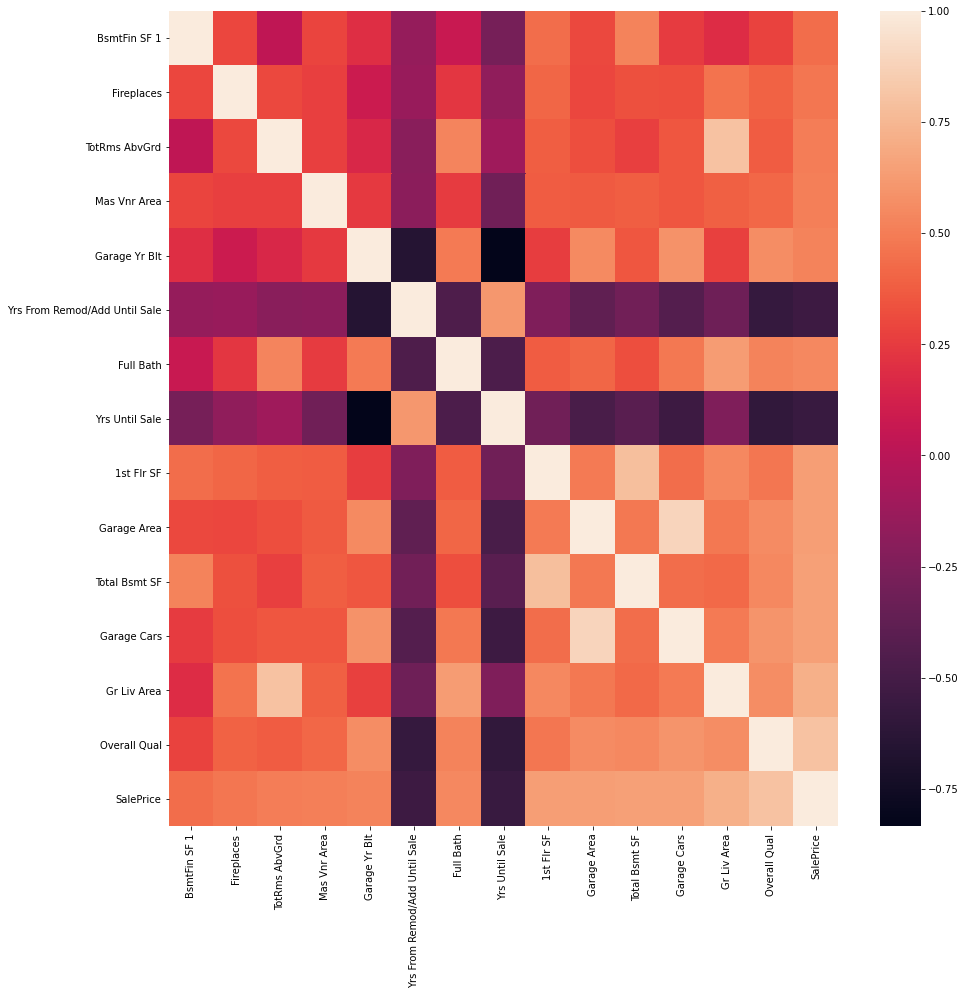

In [113]:
# correlation matrix heatmap for the correlation matrix generated above
plt.figure(figsize=(15,15))
sns.heatmap(strongly_correlated_numerical_features_corr_mtx)

Among the features that are highly correlated, the feature pairs that pose the risk of data duplication include:-
- strongly positively correlated:
    * `TotRms AbvGrd` and `Gr Liv Area`
    * `Garage Area` and `Garage Cars`
    * `Yrs From Remod/Add Until Sale` and `Yrs Until Sale`
    * `BsmtFin SF 1` and `Total Bsmt SF`
- strongly negatively correlated:
    * `Yrs From Remod/Add Until Sale` and `Overall Qual`
    * `Yrs Until Sale` and `Overall Qual`
   
Let's check the correlation strength of the aforementioned pairs of features to reaffirm that the feature pairs are collinear (and if necessary, drop some feature pairs from consideration of having collinearity).
- Let's use the general notion that a correlation strength above 0.7 is considered to be strong.

In [114]:
# TotRms AbvGrd and Gr Liv Area:
corr_strength_mtx.loc['TotRms AbvGrd','Gr Liv Area']

0.8060942417243074

In [115]:
# Garage Area and Garage Cars:
corr_strength_mtx.loc['Garage Area','Garage Cars']

0.8898480818044722

In [116]:
# Yrs From Remod/Add Until Sale and Yrs Until Sale:
corr_strength_mtx.loc['Yrs From Remod/Add Until Sale','Yrs Until Sale']

0.6126990430066296

In [117]:
# BsmtFin SF 1 and Total Bsmt SF:
corr_strength_mtx.loc['BsmtFin SF 1','Total Bsmt SF']

0.5225918253687065

In [118]:
# Yrs From Remod/Add Until Sale and Overall Qual:
corr_strength_mtx.loc['Yrs From Remod/Add Until Sale','Overall Qual']

0.5701611225248894

In [119]:
# Yrs Until Sale and Overall Qual:
corr_strength_mtx.loc['Yrs Until Sale','Overall Qual']

0.5962825429809263

It's clear that only the feature pairs (`TotRms AbvGrd`,`Gr Liv Area`) and (`Garage Area`,`Garage Cars`) are collinear, and the rest are not correlated strongly enough for consideration.

From the documentation,
- `TotRms AbvGrd` - Total rooms above grade, and `Gr Liv Area` - Above grade (ground) living area square feet. Since a continous variable captures information in a more nuance manner, let's only keep `Gr Liv Area` feature.
- `Garage Cars` - Size of garage in car capacity, and `Garage Area` - Size of garage in square feet. Using the same reasoning as above, let's drop `Garage Cars` feature.

In [120]:
collinear_columns = ['TotRms AbvGrd','Garage Cars']

In [121]:
# removing collinear columns
numerical_model_features = [col for col in numerical_model_features if col not in collinear_columns]
numerical_model_features

['BsmtFin SF 1',
 'Fireplaces',
 'Mas Vnr Area',
 'Garage Yr Blt',
 'Yrs From Remod/Add Until Sale',
 'Full Bath',
 'Yrs Until Sale',
 '1st Flr SF',
 'Garage Area',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Overall Qual',
 'SalePrice']

### Removing features with low variance

Feature columns with low/zero variance are not very informative(i.e. there is minimal/no variability in the feature column for the model to capture) and so, they don't meaningfully contribute to the model's predictive capability.
- To make proper comparisons between columns, lets perform min-max scaling to rescale feature columns to lie between 0 and 1.

In [122]:
# removing the target attribute
numerical_model_features.remove(target_column)
numerical_model_features

['BsmtFin SF 1',
 'Fireplaces',
 'Mas Vnr Area',
 'Garage Yr Blt',
 'Yrs From Remod/Add Until Sale',
 'Full Bath',
 'Yrs Until Sale',
 '1st Flr SF',
 'Garage Area',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Overall Qual']

In [123]:
numerical_features_data = numerical_features[numerical_model_features].copy()
numerical_features_data

,BsmtFin SF 1,Fireplaces,Mas Vnr Area,Garage Yr Blt,Yrs From Remod/Add Until Sale,Full Bath,Yrs Until Sale,1st Flr SF,Garage Area,Total Bsmt SF,Gr Liv Area,Overall Qual
0,639.0,2,112.0,1960.0,50,1,50,1656,528.0,1080.0,1656,6
1,468.0,0,0.0,1961.0,49,1,49,896,730.0,882.0,896,5
2,923.0,0,108.0,1958.0,52,1,52,1329,312.0,1329.0,1329,6
3,1065.0,2,0.0,1968.0,42,2,42,2110,522.0,2110.0,2110,7
4,791.0,1,0.0,1997.0,12,2,13,928,482.0,928.0,1629,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,819.0,0,0.0,1984.0,22,1,22,1003,588.0,1003.0,1003,6
2926,301.0,0,0.0,1983.0,23,1,23,902,484.0,864.0,902,5
2927,337.0,0,0.0,NaN,14,1,14,970,0.0,912.0,970,5
2928,1071.0,1,0.0,1975.0,31,1,32,1389,418.0,1389.0,1389,5


In [124]:
rescaled_numerical_features_data = (numerical_features_data - numerical_features_data.min())/(numerical_features_data.max() - numerical_features_data.min())
rescaled_numerical_features_data

,BsmtFin SF 1,Fireplaces,Mas Vnr Area,Garage Yr Blt,Yrs From Remod/Add Until Sale,Full Bath,Yrs Until Sale,1st Flr SF,Garage Area,Total Bsmt SF,Gr Liv Area,Overall Qual
0,0.113218,0.50,0.07000,0.208333,0.833333,0.25,0.367647,0.303350,0.354839,0.176759,0.249058,0.555556
1,0.082920,0.00,0.00000,0.211538,0.816667,0.25,0.360294,0.128958,0.490591,0.144354,0.105878,0.444444
2,0.163536,0.00,0.06750,0.201923,0.866667,0.25,0.382353,0.228316,0.209677,0.217512,0.187453,0.555556
3,0.188696,0.50,0.00000,0.233974,0.700000,0.50,0.308824,0.407526,0.350806,0.345336,0.334589,0.666667
4,0.140149,0.25,0.00000,0.326923,0.200000,0.50,0.095588,0.136301,0.323925,0.151882,0.243971,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.145110,0.00,0.00000,0.285256,0.366667,0.25,0.161765,0.153511,0.395161,0.164157,0.126036,0.555556
2926,0.053331,0.00,0.00000,0.282051,0.383333,0.25,0.169118,0.130335,0.325269,0.141408,0.107008,0.444444
2927,0.059709,0.00,0.00000,NaN,0.233333,0.25,0.102941,0.145939,0.000000,0.149264,0.119819,0.444444
2928,0.189759,0.25,0.00000,0.256410,0.516667,0.25,0.235294,0.242084,0.280914,0.227332,0.198757,0.444444


In [125]:
numerical_features_variance = rescaled_numerical_features_data.var().sort_values()
numerical_features_variance

Total Bsmt SF                    0.005022
BsmtFin SF 1                     0.006343
Garage Yr Blt                    0.006716
1st Flr SF                       0.007743
Gr Liv Area                      0.008797
Mas Vnr Area                     0.012254
Full Bath                        0.019079
Garage Area                      0.020800
Overall Qual                     0.024466
Fireplaces                       0.026217
Yrs Until Sale                   0.049586
Yrs From Remod/Add Until Sale    0.120825
dtype: float64

All features have variances close to each other. Hence, lets not remove any features.

### Removing other features

In [126]:
numerical_features_data.isnull().sum()

BsmtFin SF 1                       0
Fireplaces                         0
Mas Vnr Area                       0
Garage Yr Blt                    157
Yrs From Remod/Add Until Sale      0
Full Bath                          0
Yrs Until Sale                     0
1st Flr SF                         0
Garage Area                        0
Total Bsmt SF                      0
Gr Liv Area                        0
Overall Qual                       0
dtype: int64

- The `Garage Yr Blt` feature contains missing values (because a garage doesn't exist for such homes). However, since the model can't contain missing values and the feature has a low variance, let's remove this feature from the set of numerical features that the linear regression model will use for training. In addition, using an year directly as a feature can distort predictions, so it consolidates the fact that it should be removed.

In [127]:
numerical_model_features.remove('Garage Yr Blt')
numerical_model_features

['BsmtFin SF 1',
 'Fireplaces',
 'Mas Vnr Area',
 'Yrs From Remod/Add Until Sale',
 'Full Bath',
 'Yrs Until Sale',
 '1st Flr SF',
 'Garage Area',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Overall Qual']

In [128]:
numerical_features[numerical_model_features].isnull().sum()

BsmtFin SF 1                     0
Fireplaces                       0
Mas Vnr Area                     0
Yrs From Remod/Add Until Sale    0
Full Bath                        0
Yrs Until Sale                   0
1st Flr SF                       0
Garage Area                      0
Total Bsmt SF                    0
Gr Liv Area                      0
Overall Qual                     0
dtype: int64

## Feature Selection for categorical features

In [129]:
categorical_features = housing_data_copy.select_dtypes(include=['category'])
categorical_features

,MS SubClass,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type
0,20,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Stone,CBlock,GasA,Y,Attchd
1,20,RH,Pave,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,None,CBlock,GasA,Y,Attchd
2,20,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,CBlock,GasA,Y,Attchd
3,20,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,None,CBlock,GasA,Y,Attchd
4,60,RL,Pave,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,None,PConc,GasA,Y,Attchd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,Lvl,CulDSac,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,None,CBlock,GasA,Y,Detchd
2926,20,RL,Pave,Low,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,None,CBlock,GasA,Y,Attchd
2927,85,RL,Pave,Lvl,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,None,PConc,GasA,Y,NaN
2928,20,RL,Pave,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,None,CBlock,GasA,Y,Attchd


In [130]:
# categorical features that we will use for training the linear regression model (by encoding them into numerical features)
categorical_model_features = list()

### Selecting Feature columns based on number of unique values/categories

In [131]:
categorical_feature_num_unique_values_mapping = {feature_name : len(feature_col.unique()) for feature_name,feature_col in categorical_features.iteritems()}
categorical_feature_num_unique_values_mapping

{'MS SubClass': 16,
 'MS Zoning': 7,
 'Street': 2,
 'Land Contour': 4,
 'Lot Config': 5,
 'Neighborhood': 28,
 'Condition 1': 9,
 'Condition 2': 8,
 'Bldg Type': 5,
 'House Style': 8,
 'Roof Style': 6,
 'Roof Matl': 8,
 'Mas Vnr Type': 5,
 'Foundation': 6,
 'Heating': 6,
 'Central Air': 2,
 'Garage Type': 7}

In [132]:
categorical_feature_num_unique_values = pd.Series(data=categorical_feature_num_unique_values_mapping)
categorical_feature_num_unique_values

MS SubClass     16
MS Zoning        7
Street           2
Land Contour     4
Lot Config       5
Neighborhood    28
Condition 1      9
Condition 2      8
Bldg Type        5
House Style      8
Roof Style       6
Roof Matl        8
Mas Vnr Type     5
Foundation       6
Heating          6
Central Air      2
Garage Type      7
dtype: int64

In [133]:
categorical_feature_num_unique_values.describe()

count    17.000000
mean      7.764706
std       6.088200
min       2.000000
25%       5.000000
50%       6.000000
75%       8.000000
max      28.000000
dtype: float64

Majority of the categorical columns contain less than or equal to 8 unique categories. Let's check how many features have more than 10 categories and how many have less than or equal to 10 unique values. We do this to determine an initial cutoff for deciding which features to include for model training purposes.
- If a categorical column has many unique values (or categories), dummy coding this column will result in adding many columns back to the data frame.

In [134]:
features_with_many_categories = categorical_feature_num_unique_values[categorical_feature_num_unique_values > 10]
features_with_many_categories.size

2

In [135]:
features_with_less_categories = categorical_feature_num_unique_values[categorical_feature_num_unique_values <= 10]
features_with_less_categories.size

15

The initial cutoff of 10 unique values, seems to work well.

In [136]:
categorical_model_features.extend(features_with_less_categories.index)
categorical_model_features

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type']

### Removing features based on distribution of unique values

In [137]:
categorical_features_descriptive_stats = categorical_features[categorical_model_features].describe()
categorical_features_descriptive_stats

,MS Zoning,Street,Land Contour,Lot Config,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type
count,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2769
unique,7,2,4,5,9,8,5,8,6,8,5,6,6,2,6
top,RL,Pave,Lvl,Inside,Norm,Norm,1Fam,1Story,Gable,CompShg,None,PConc,GasA,Y,Attchd
freq,2269,2914,2631,2137,2519,2897,2421,1479,2319,2883,1774,1306,2881,2730,1729


In [138]:
# calculating mode count of categorical features in percentage
categorical_features_mode_freq_pcts = ((categorical_features_descriptive_stats.loc['freq'].astype('float')/
                                       categorical_features_descriptive_stats.loc['count'].astype('float'))*100)
categorical_features_mode_freq_pcts

MS Zoning       77.546138
Street          99.589884
Land Contour    89.917977
Lot Config      73.034860
Condition 1     86.090226
Condition 2     99.008886
Bldg Type       82.740943
House Style     50.546822
Roof Style      79.254956
Roof Matl       98.530417
Mas Vnr Type    60.628845
Foundation      44.634313
Heating         98.462064
Central Air     93.301435
Garage Type     62.441315
dtype: float64

In [139]:
categorical_features_mode_freq_pcts.describe()

count    15.000000
mean     79.715272
std      18.136128
min      44.634313
25%      67.738087
50%      82.740943
75%      95.881750
max      99.589884
dtype: float64

Majority of the categorical features have one unique value/category (i.e. the mode) account for less than or equal to approx. 95% of values in those feature columns. 

Any feature whose mode accounts for greater than 95% of all values in the feature column is similar to a low variance numerical feature (i.e there is no variability in the data for the model to capture). Such columns should be dropped.

In [140]:
low_variability_categorical_features = categorical_features_mode_freq_pcts[categorical_features_mode_freq_pcts > 95].index
low_variability_categorical_features

Index(['Street', 'Condition 2', 'Roof Matl', 'Heating'], dtype='object')

In [141]:
categorical_model_features = [col for col in categorical_model_features if col not in low_variability_categorical_features]
categorical_model_features

['MS Zoning',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Mas Vnr Type',
 'Foundation',
 'Central Air',
 'Garage Type']

### Dummy encoding categorical features into numerical features

In [142]:
encoded_categorical_features_data = pd.get_dummies(data=categorical_features[categorical_model_features],prefix=categorical_model_features)
encoded_categorical_features_data

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd
0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2926,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2927,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2928,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0


## Final dataset used by the linear regression model

In [143]:
# transforming the dataset to include only numeric features obtained via feature selection processes for both numerical features and categorical features present in the feature-engineered dataset
final_model_dataset = pd.concat([housing_data_copy[numerical_model_features],encoded_categorical_features_data,housing_data_copy[target_column]],axis='columns',join='inner')
final_model_dataset.reset_index(drop=True,inplace=True)
final_model_dataset

,BsmtFin SF 1,Fireplaces,Mas Vnr Area,Yrs From Remod/Add Until Sale,Full Bath,Yrs Until Sale,1st Flr SF,Garage Area,Total Bsmt SF,Gr Liv Area,Overall Qual,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,SalePrice
0,639.0,2,112.0,50,1,50,1656,528.0,1080.0,1656,6,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,215000
1,468.0,0,0.0,49,1,49,896,730.0,882.0,896,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,105000
2,923.0,0,108.0,52,1,52,1329,312.0,1329.0,1329,6,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,172000
3,1065.0,2,0.0,42,2,42,2110,522.0,2110.0,2110,7,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,244000
4,791.0,1,0.0,12,2,13,928,482.0,928.0,1629,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,819.0,0,0.0,22,1,22,1003,588.0,1003.0,1003,6,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,142500
2922,301.0,0,0.0,23,1,23,902,484.0,864.0,902,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,131000
2923,337.0,0,0.0,14,1,14,970,0.0,912.0,970,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,132000
2924,1071.0,1,0.0,31,1,32,1389,418.0,1389.0,1389,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,170000


# Train and Test

Let's add a parameter 'k' that controls the type of cross validation that occurs.
- if k = 1 (default value):
    * performs simple validation (train-test split = 1:1)
- if k = 2:
    * performs 2-fold/simple cross validation, or holdout validation (2 folds)
- if k > 2:
    * performs k-fold cross validation (k folds)

In [144]:
def train_and_test(final_dataset,k=1):
    features = final_dataset.columns.drop(target_column)
    lrm = LinearRegression()
    
    if k == 1:
        num_observations = final_dataset.shape[0]
        train_test_demarcator = round(num_observations/2)
        train_set = final_dataset[:train_test_demarcator]
        test_set = final_dataset[train_test_demarcator:]
              
        # fitting model to data:
        lrm = lrm.fit(train_set[features],train_set[target_column])
        
        # making predictions:
        predicted_targetcol_values = lrm.predict(test_set[features])
        
        # evaluating model prediction quality:
        model_mse = mean_squared_error(test_set[target_column],predicted_targetcol_values)
        model_rmse = np.sqrt(model_mse)
        
        return model_rmse
    
    if k == 2:
        # randomizing the order of observations
        shuffled_final_dataset = final_dataset.sample(frac=1,random_state=1)
        
        num_observations = final_dataset.shape[0]
        fold_demarcator = round(num_observations/2)
        fold_one = shuffled_final_dataset[:fold_demarcator]
        fold_two = shuffled_final_dataset[fold_demarcator:]
        
        # 1st iteration(train on fold one, test on fold two):
        lrm = lrm.fit(fold_one[features],fold_one[target_column])
        
        # making predictions:
        predictions_one = lrm.predict(fold_two[features])
        mse_one = mean_squared_error(fold_two[target_column],predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        # 2nd iteration(train on fold two, test on fold one):
        lrm = lrm.fit(fold_two[features],fold_two[target_column])
        
        # making predictions:
        predictions_two = lrm.predict(fold_one[features])
        mse_two = mean_squared_error(fold_one[target_column],predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one,rmse_two])
        
        return avg_rmse
    else:
        kf = KFold(n_splits=k,shuffle=True,random_state=1)
        model_mses = np.abs(cross_val_score(estimator=lrm,
                                  X=final_dataset[features],
                                  y=final_dataset[target_column],
                                  scoring='neg_mean_squared_error',
                                  cv=kf)
                           )
        model_rmses = np.sqrt(model_mses)
        avg_rmse = model_rmses.mean()
        
        return avg_rmse

## Evaluating Predictions

The quality of a model's predictions can be quantified by an error metric. We will use the RMSE(Root Mean Squared Error) for understanding model accuracy.

In [145]:
# let's use 4 folds for testing it out:
model_prediction_quality = train_and_test(final_model_dataset,k=4)
model_prediction_quality

30991.17917051622

This RMSE value is drastically lower than the previous one in this project. The improvement in model accuracy can be attributed to feature engineering and selection that we performed.

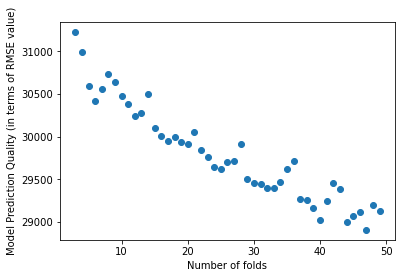

In [146]:
# different number of folds to iterate on
num_folds = np.arange(3,50)
model_prediction_qualities = list()

for fold in num_folds:
    model_prediction_quality = train_and_test(final_model_dataset,k=fold)
    model_prediction_qualities.append(model_prediction_quality)

plt.scatter(x=num_folds,y=model_prediction_qualities)
plt.xlabel('Number of folds')
plt.ylabel('Model Prediction Quality (in terms of RMSE value)')
plt.show()